In [3]:
#!pip install textblob

In [4]:
#!pip install skimpy

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from skimpy import skim
import matplotlib
matplotlib.rcParams['figure.figsize']= (16, 8)

## **Load Data**

In [7]:
#load data
df = pd.read_csv('Hotel_Reviews.csv')
print(df.shape)
df.head()

(515738, 17)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## **Data Cleaning**

In [9]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [10]:
#Review Date data type
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# create Month and Year columns 
df['Month'] = df['Review_Date'].dt.month
df['Year']  = df['Review_Date'].dt.year
df['Day_of_Week'] = df['Review_Date'].dt.dayofweek+1

In [11]:
#checking missing values 
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
Month                                            0
Year                                             0
Day_of_Week                    

In [12]:
#remove unnecessary columns 
col_drop = df[['Hotel_Address',
                'Additional_Number_of_Scoring',
                'Average_Score',
                'Hotel_Name',
                'Total_Number_of_Reviews_Reviewer_Has_Given',
                'Tags',
                'days_since_review',
                'lat',
                'lng']]
df.drop(columns = col_drop, inplace = True)
df.head(10)              

,Review_Date,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Month,Year,Day_of_Week
0,2017-08-03,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,2.9,8,2017,4
1,2017-08-03,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7.5,8,2017,4
2,2017-07-31,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,7.1,7,2017,1
3,2017-07-31,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,3.8,7,2017,1
4,2017-07-24,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,6.7,7,2017,1
5,2017-07-24,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,6.7,7,2017,1
6,2017-07-17,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,4.6,7,2017,1
7,2017-07-17,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,10.0,7,2017,1
8,2017-07-09,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,6.5,7,2017,7
9,2017-07-08,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,7.9,7,2017,6


In [13]:
#replace 'No negative' and 'No positive'
df['Negative_Review'] = df['Negative_Review'].str.replace('No Negative', 'Neutral')
df['Positive_Review'] = df['Positive_Review'].str.replace('No Positive', 'Neutral')

In [14]:
#drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(515173, 11)

## **Exploratory Data Analysis**

In [16]:
#using skimpy for descriptive statistics
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 515173 │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Review_Total_Negative_Wo │   0 │     0 │  18.54 │   29.69 │     0 │     2 │     9 │    23 │   408 │   ▇    │  │
│ │ rd_Counts                │     │       │        │         │       │       │       │       │       │        │  │
│ │ Total_Number_of_Reviews  │   0 │     0 │   2745 │    2318 │    43 │  1161 │  2134 │  3633 │ 16670 │  ▇▃▁   │  │
│ │ Review_Total_Positive_Wo │   0 │     0 │  17.78 │    21.8 │     0 │     5 │    11 │    22 │   395 │   ▇    │  │
│ │ rd_Counts                │     │       │        │         │       │       │       │       │       │        │  │
│ │ Reviewer_Score           │   0 │     0 │  8.396 │   1.637 │   2.5 │   7.5 │   8.8 │   9.6 │    10 │   ▁▂▃▇ │  │
│ │ Month                    │   0 │     0 │  6.486 │   3.352 │     1 │     4 │     7 │     9 │    12 │ ▆▇▇▇▇▆ │  │
│ │ Year                     │   0 │     0 │   2016 │  0.6875 │  2015 │  2016 │  2016 │  2017 │  2017 │ ▃  ▇ ▅ │  │
│ │ Day_of_Week              │   0 │     0 │  3.722 │   2.084 │     1 │     2 │     3 │     6 │     7 │ ▅▇▃▅▃▇ │  │
│ └──────────────────────────┴─────┴───────┴────────┴─────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Review_Date            │      0 │         0 │     2015-08-04      │     2017-08-03      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Reviewer_Nationality                  │     0 │     

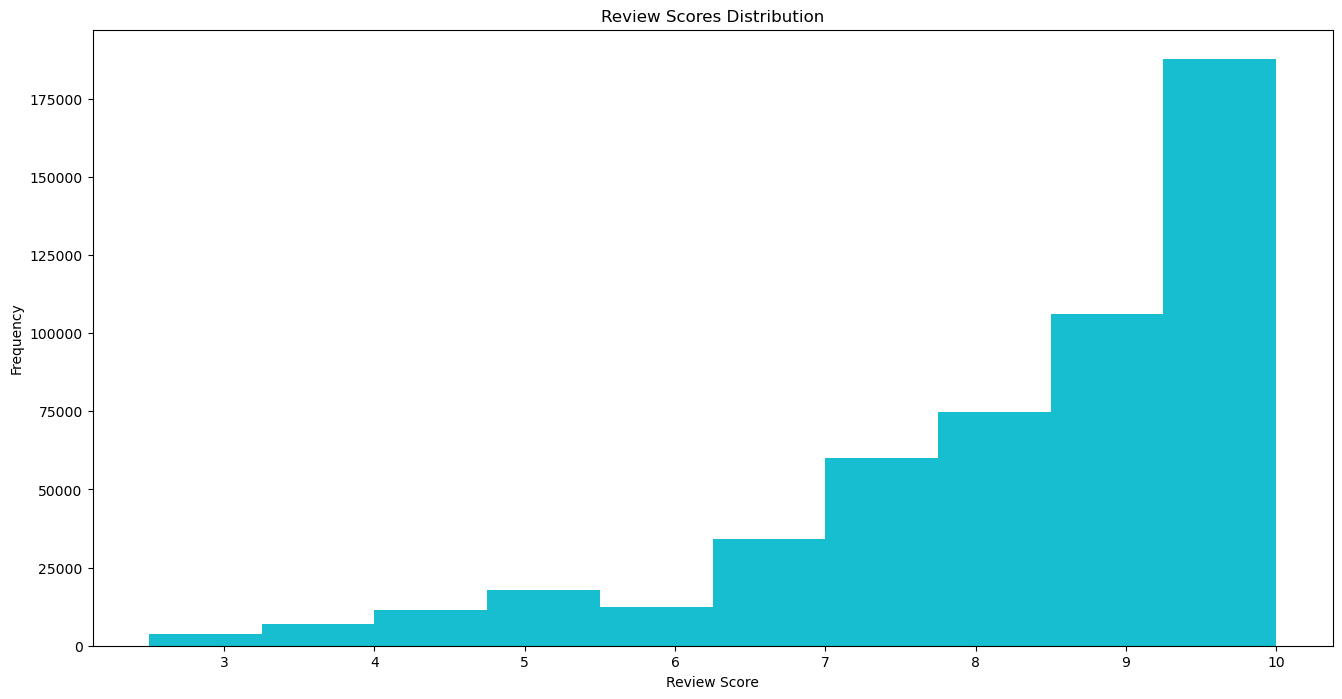

In [17]:
#revier score distribution
df['Reviewer_Score'].plot(kind= 'hist', color = 'C9')
plt.xlabel('Review Score')
plt.title('Review Scores Distribution');

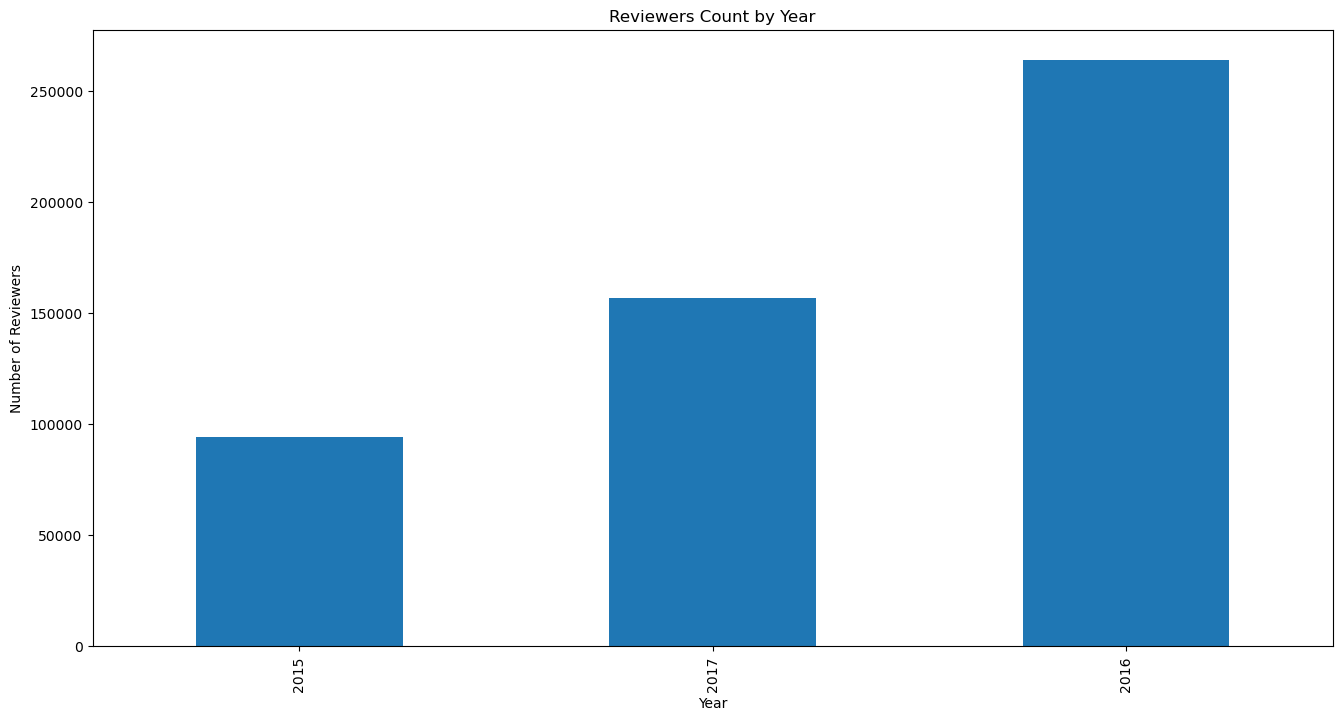

In [18]:
# reviewers by natianality over period
df.groupby('Year')['Reviewer_Nationality'].count().sort_values().plot(kind = 'bar')
plt.ylabel('Number of Reviewers')
plt.title('Reviewers Count by Year');


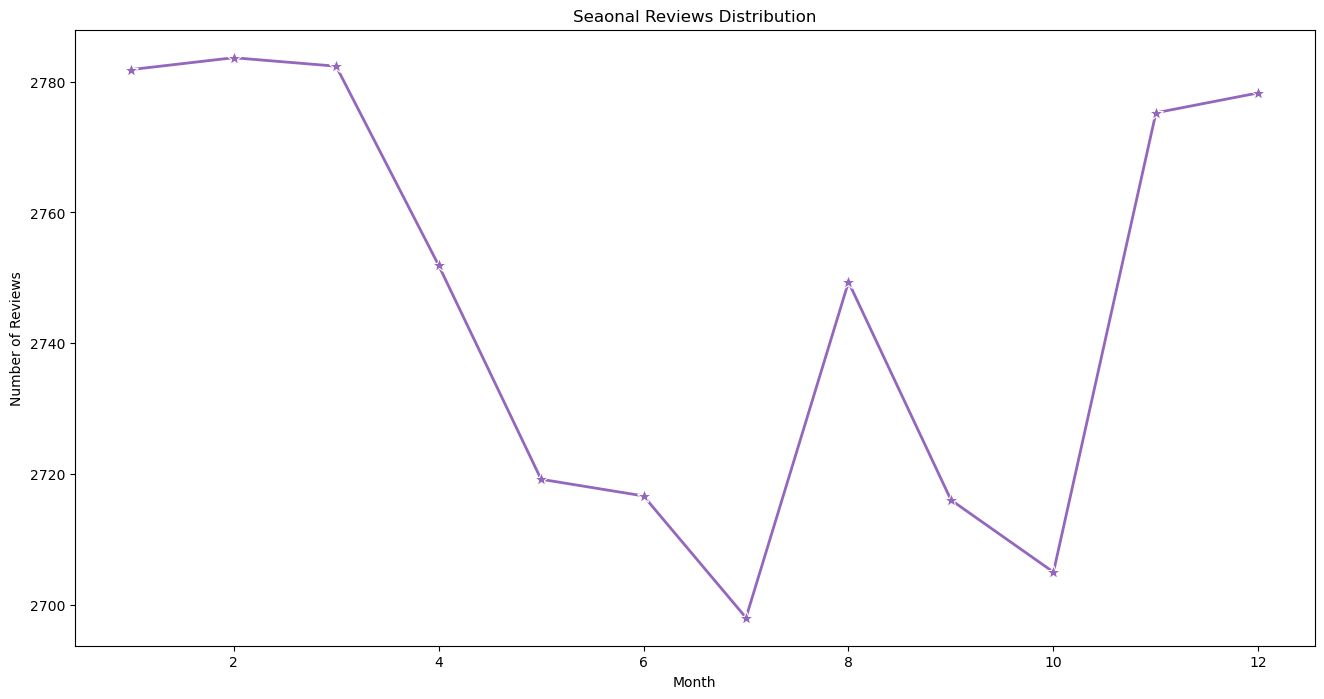

In [19]:
#seasonal reviews
sns.lineplot(data = df, x = 'Month', y = 'Total_Number_of_Reviews', errorbar = None, marker = '*', markersize = 10,  color = 'C4', linewidth = 2)
plt.ylabel('Number of Reviews')
plt.title('Seaonal Reviews Distribution');

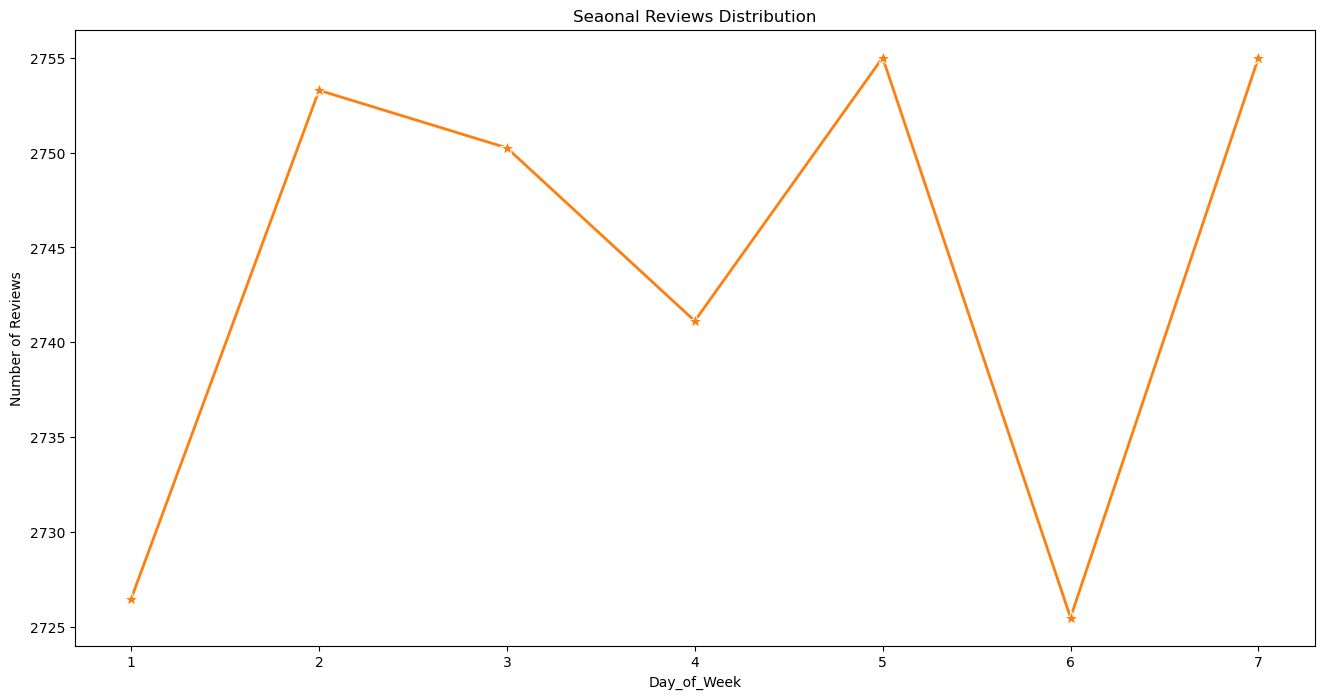

In [20]:
sns.lineplot(data = df, x = 'Day_of_Week', y = 'Total_Number_of_Reviews', errorbar = None, marker = '*', markersize = 10, color = 'C1', linewidth = 2)
plt.ylabel('Number of Reviews')
plt.title('Seaonal Reviews Distribution');

## **Text Preprosessing**

In [22]:
#import libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#preprocessing function
def preprocess(text):
    # for lowercasing
    text = text.lower()
    # for tokenizing
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(w) for w in words if not w in stop_words]
    return ' '.join(words)

df['Positive_Sentiments'] = df['Positive_Review'].apply(preprocess)
df['Negative_Sentiments'] = df['Negative_Review'].apply(preprocess)

[nltk_data] Downloading package stopwords to C:\Users\RICH-
[nltk_data]     FILES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\RICH-
[nltk_data]     FILES\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\RICH-
[nltk_data]     FILES\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df.head(5)

,Review_Date,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Month,Year,Day_of_Week,Positive_Sentiments,Negative_Sentiments
0,2017-08-03,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,2.9,8,2017,4,park outside hotel beautiful,angry made post available via possible site us...
1,2017-08-03,Ireland,Neutral,0,1403,No real complaints the hotel was great great ...,105,7.5,8,2017,4,real complaint hotel great great location surr...,neutral
2,2017-07-31,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,7.1,7,2017,1,location good staff ok cute hotel breakfast ra...,room nice elderly bit difficult room two story...
3,2017-07-31,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,3.8,7,2017,1,great location nice surroundings bar restauran...,room dirty afraid walk barefoot floor looked c...
4,2017-07-24,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,6.7,7,2017,1,amazing location building romantic setting,booked company line showed picture room though...


## **Sentiment Analysis**

In [25]:
# sentiment analysis function
def analyze_sentiment(text):
    blob = TextBlob(text)
    # TextBlob returns polarity between -1 (negative) and 1 (positive)
    sentiment = blob.sentiment.polarity
    return sentiment

df['sentiment_negative'] = df['Negative_Review'].apply(analyze_sentiment)
df['sentiment_positive'] = df['Positive_Review'].apply(analyze_sentiment)


In [26]:
df.head()

,Review_Date,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Month,Year,Day_of_Week,Positive_Sentiments,Negative_Sentiments,sentiment_negative,sentiment_positive
0,2017-08-03,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,2.9,8,2017,4,park outside hotel beautiful,angry made post available via possible site us...,0.028671,0.283333
1,2017-08-03,Ireland,Neutral,0,1403,No real complaints the hotel was great great ...,105,7.5,8,2017,4,real complaint hotel great great location surr...,neutral,0.000000,0.241960
2,2017-07-31,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,7.1,7,2017,1,location good staff ok cute hotel breakfast ra...,room nice elderly bit difficult room two story...,0.032653,0.460000
3,2017-07-31,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,3.8,7,2017,1,great location nice surroundings bar restauran...,room dirty afraid walk barefoot floor looked c...,-0.070370,0.625000
4,2017-07-24,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,6.7,7,2017,1,amazing location building romantic setting,booked company line showed picture room though...,-0.009091,0.300000


In [73]:
#checking negative sentiments
len(df[df['sentiment_negative'] < 0 ])

149417

In [71]:
#checking positive sentiments
len(df[df['sentiment_positive'] > 0])

400150

In [28]:
!pip install wordcloud

In [29]:
#import word cloud
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

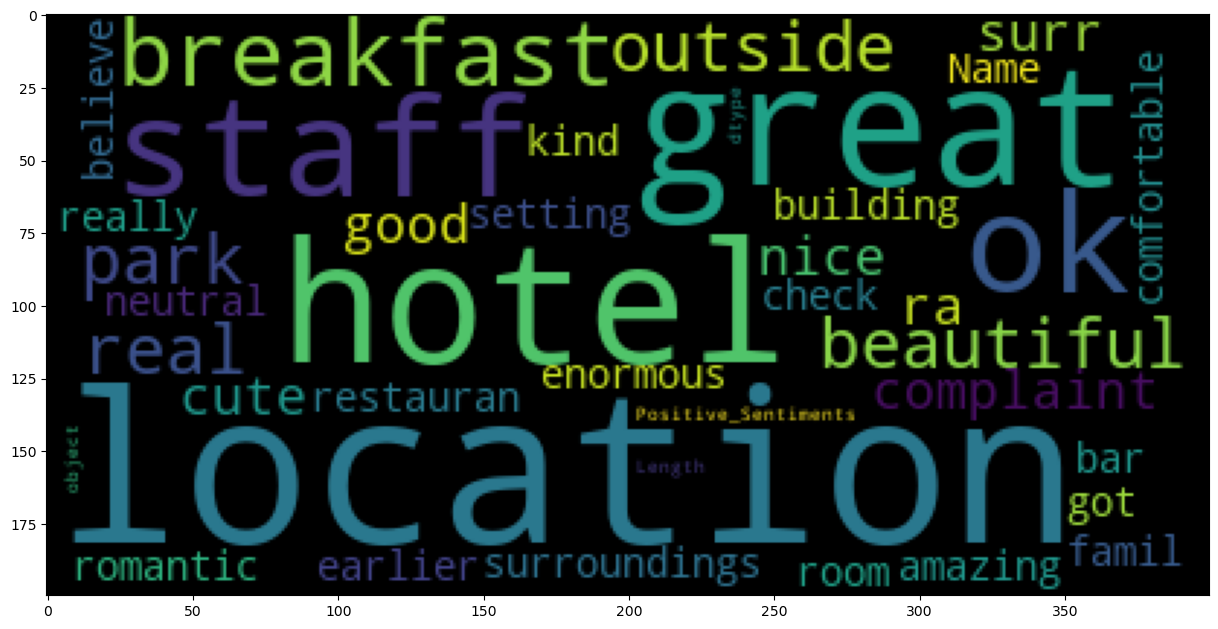

In [30]:
#word cloud for positive sentiments
positive_cloud  =  WordCloud(max_words = 200).generate(str(df['Positive_Sentiments']))
plt.figure(figsize = (15, 15))
plt.imshow(positive_cloud)
plt.savefig('positive_sentiments.png');

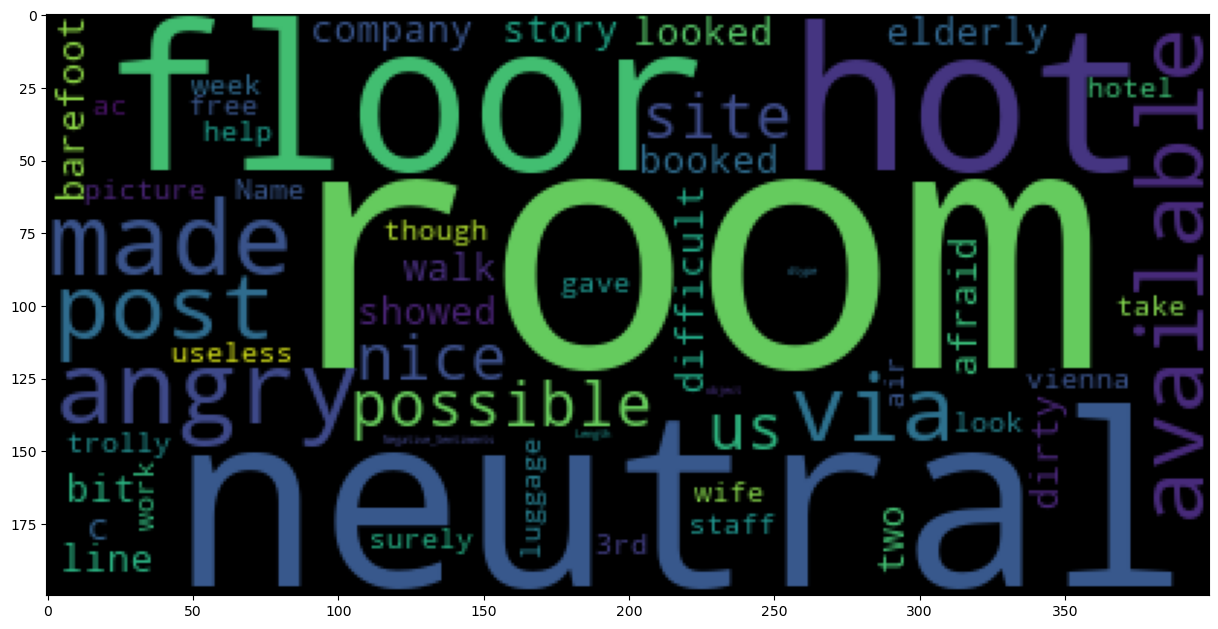

In [75]:
#word cloud for negative sentiments
negative_cloud  =  WordCloud(max_words = 200).generate(str(df['Negative_Sentiments']))
plt.figure(figsize = (15, 15))
plt.imshow(negative_cloud)
plt.savefig('negative_sentiments.png');